## Practice: Basic Artificial Neural Networks
Credits: this notebook belongs to [Practical DL](https://docs.google.com/forms/d/e/1FAIpQLScvrVtuwrHSlxWqHnLt1V-_7h2eON_mlRR6MUb3xEe5x9LuoA/viewform?usp=sf_link) course by Yandex School of Data Analysis.

We will start working with neural networks on the practice session. Your homework will be to finish the implementation of the layers.

Our goal is simple, yet an actual implementation may take some time :). We are going to write an Artificial Neural Network (almost) from scratch. The software design was heavily inspired by [PyTorch](http://pytorch.org) which is the main framework of our course 

In [324]:
%matplotlib inline
from time import time, sleep
import numpy as np
import matplotlib.pyplot as plt
from IPython import display

# Framework

Implement everything in `modules.ipynb`. Read all the comments thoughtfully to ease the pain. Please try not to change the prototypes.

Do not forget, that each module should return **AND** store `output` and `gradInput`.

The typical assumption is that `module.backward` is always executed after `module.forward`,
so `output` is stored, this would be useful for `SoftMax`. 

### Tech note
Prefer using `np.multiply`, `np.add`, `np.divide`, `np.subtract` instead of `*`,`+`,`/`,`-` for better memory handling.

Example: suppose you allocated a variable 

```
a = np.zeros(...)
```
So, instead of
```
a = b + c  # will be reallocated, GC needed to free
``` 
You can use: 
```
np.add(b,c,out = a) # puts result in `a`
```

In [325]:
# (re-)load layers
%run modules__attempt.ipynb

# Toy example

Use this example to debug your code, start with logistic regression and then test other layers. You do not need to change anything here. This code is provided for you to test the layers. Also it is easy to use this code in MNIST task.

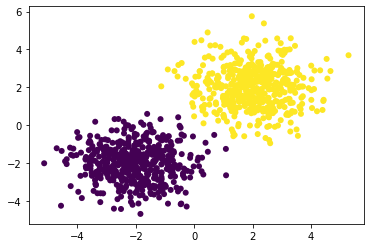

In [326]:
# Generate some data
N = 500

X1 = np.random.randn(N,2) + np.array([2,2])
X2 = np.random.randn(N,2) + np.array([-2,-2])

Y = np.concatenate([np.ones(N),np.zeros(N)])[:,None]
Y = np.hstack([Y, 1-Y])

X = np.vstack([X1,X2])
plt.scatter(X[:,0],X[:,1], c = Y[:,0], edgecolors= 'none')

Define a **logistic regression** for debugging. 

In [327]:
net = Sequential()
net.add(Linear(2, 2))
net.add(LogSoftMax())

criterion = ClassNLLCriterion()

print(net)

# Test something like that then 

# net = Sequential()
# net.add(Linear(2, 4))
# net.add(ReLU())
# net.add(Linear(4, 2))
# net.add(LogSoftMax())

Linear 2 -> 2
LogSoftMax



Start with batch_size = 1000 to make sure every step lowers the loss, then try stochastic version.

In [328]:
# Iptimizer params
optimizer_config = {'learning_rate' : 1e-1, 'momentum': 0.9}
optimizer_state = {}

# Looping params
n_epoch = 20
batch_size = 128

In [329]:
# batch generator
def get_batches(dataset, batch_size):
    X, Y = dataset
    n_samples = X.shape[0]
        
    # Shuffle at the start of epoch
    indices = np.arange(n_samples)
    np.random.shuffle(indices)
    
    for start in range(0, n_samples, batch_size):
        end = min(start + batch_size, n_samples)
        
        batch_idx = indices[start:end]
    
        yield X[batch_idx], Y[batch_idx]

In [330]:
k = 1
for x_batch, y_batch in get_batches((X, Y), 128):
    print(k)
    k += 1

1
2
3
4
5
6
7
8


In [331]:
len(X) / 128

7.8125

### Train

Basic training loop. Examine it.

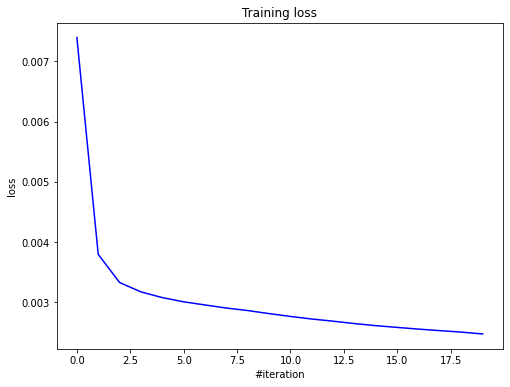

Current loss: 0.002474


In [332]:
loss_history = []

for i in range(n_epoch):
    for x_batch, y_batch in get_batches((X, Y), batch_size):
        
        net.zeroGradParameters()
        
        # Forward
        predictions = net.forward(x_batch)
        loss = criterion.forward(predictions, y_batch)
    
        # Backward
        dp = criterion.backward(predictions, y_batch)
        net.backward(x_batch, dp)
        
        # Update weights
        sgd_momentum(net.getParameters(), 
                     net.getGradParameters(), 
                     optimizer_config,
                     optimizer_state)      
        
        
    
    predictions = net.forward(X)
    loss = criterion.forward(predictions, Y)
    loss_history.append(loss)
    
    # Visualize
    display.clear_output(wait=True)
    plt.figure(figsize=(8, 6))
        
    plt.title("Training loss")
    plt.xlabel("#iteration")
    plt.ylabel("loss")
    plt.plot(loss_history, 'b')
    plt.show()
    
    print('Current loss: %f' % loss)    

In [333]:
net

Linear 2 -> 2
LogSoftMax

In [334]:
net.forward(X)

array([[-6.50942720e-07, -1.42448445e+01],
       [-2.27995400e-12, -2.68068844e+01],
       [-1.04341242e-02, -4.56788620e+00],
       ...,
       [-2.84014113e+01, -4.62740957e-13],
       [-1.91794807e+01, -4.68227966e-09],
       [-3.17387508e+01, -1.64313008e-14]])

# Digit classification 

We are using old good [MNIST](http://yann.lecun.com/exdb/mnist/) as our dataset.

In [335]:
import mnist
X_train, y_train, X_val, y_val, X_test, y_test = mnist.load_dataset(flatten=True)

In [336]:
X_train.shape

(50000, 784)

In [337]:
X_val.shape

(10000, 784)

In [338]:
X_test.shape

(10000, 784)

One-hot encode the labels first.

In [339]:
# Your code goes here. ################################################

In [340]:
def OneHotEncoder(y):
    return np.eye(10)[y]

In [341]:
y_train = OneHotEncoder(y_train)
y_val = OneHotEncoder(y_val)
y_test = OneHotEncoder(y_test)

- **Compare** `ReLU`, `ELU`, `LeakyReLU`, `SoftPlus` activation functions. 
You would better pick the best optimizer params for each of them, but it is overkill for now. Use an architecture of your choice for the comparison.
- **Try** inserting `BatchNormalization` (folowed by `ChannelwiseScaling`) between `Linear` module and activation functions.
- Plot the losses both from activation functions comparison and `BatchNormalization` comparison on one plot. Please find a scale (log?) when the lines are distinguishable, do not forget about naming the axes, the plot should be goodlooking.
- Plot the losses for two networks: one trained by momentum_sgd, another one trained by Adam. Which one performs better?
- Hint: good logloss for MNIST should be around 0.5. 

**<font color=blue>Observations</font>**

As pointed out above, hyperparameter optimization is very time consuming, which excuses from using cross-validation, and hence, using the validation part of the data. Therefore we'll train our model on the train set (by batches), then at the end of an epoch we'll calculate the loss and accuracy on the train and test set and see how the model does.

In [342]:
# Your code goes here. ################################################

## Let's do it first just with ReLU

### Train

In [343]:
n_epoch = 3
batch_size = 500

In [344]:
net_ReLU = Sequential()
net_ReLU.add(Linear(784, 100))
#net_ReLU.add(ReLU())
#net_ReLU.add(Linear(200, 100))
net_ReLU.add(ReLU())
net_ReLU.add(Linear(100, 10))
net_ReLU.add(LogSoftMax())

In [345]:
optimizer_config = {'learning_rate' : 1e-2, 'momentum': 0.9, 'beta1': 0.9, 'beta2': 0.9, 'epsilon': 10e-6}
optimizer_state = {}

In [346]:
criterion = ClassNLLCriterion()

In [347]:
from time import time

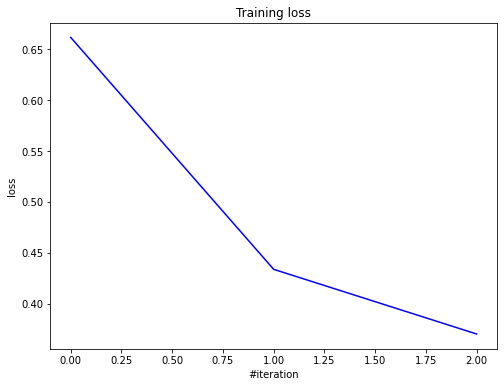

100%|██████████| 3/3 [01:49<00:00, 36.46s/it]

Iteration number: 3
Current loss: 0.374327


In [348]:
train_loss_history = []
#test_loss_history = []

time_start = time()
for i in tqdm(range(n_epoch)):
    for x_batch, y_batch in get_batches((X_train, y_train), batch_size):
        
        net_ReLU.zeroGradParameters()
        
        # Forward
        predictions = net_ReLU.forward(x_batch)
        loss = criterion.forward(predictions, y_batch)
    
        # Backward
        dp = criterion.backward(predictions, y_batch)
        net_ReLU.backward(x_batch, dp)
        
        # Update weights
        sgd_momentum(net_ReLU.getParameters(), 
                     net_ReLU.getGradParameters(), 
                     optimizer_config,
                     optimizer_state) 
    
    
    train_pred = net_ReLU.forward(X_train)
    train_loss = criterion.forward(train_pred, y_train)
    train_loss_history.append(train_loss)
    
    #test_pred = net_ReLU.forward(X_test)
    #test_loss = criterion.forward(test_pred, y_test)
    #test_loss_history.append(test_loss)
    
    # Visualize
    display.clear_output(wait=True)
    plt.figure(figsize=(8, 6))
        
    plt.title("Training loss")
    plt.xlabel("#iteration")
    plt.ylabel("loss")
    plt.plot(train_loss_history, 'b')
    #plt.plot(test_loss_history, color='orange')
    plt.show()
    
    print('Iteration number: {}'.format(i+1))
    print('Current loss: %f' % loss) 

time_end = time()
time_elapsed = time_end - time_start

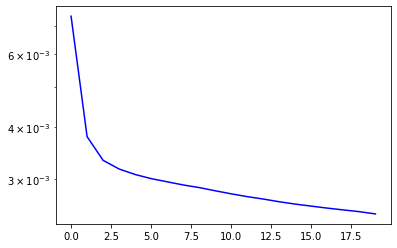

In [349]:
plt.semilogy(loss_history, 'b')

In [350]:
time_elapsed

109.39319920539856

### With Batch Normalization

- Try inserting BatchNormalization (folowed by ChannelwiseScaling) between Linear module and activation functions.

In [351]:
net_bn = Sequential()
net_bn.add(Linear(784, 100))
net_bn.add(BatchNormalization(alpha=0.1))
net_bn.add(ChannelwiseScaling(100))
net_bn.add(ReLU())
#net_BN.add(Linear(100, 200))
#net_BN.add(ReLU())
net_bn.add(Linear(100, 10))
net_bn.add(LogSoftMax())

In [352]:
optimizer_config = {'learning_rate' : 1e-2, 'momentum': 0.9, 'beta1': 0.9, 'beta2': 0.9, 'epsilon': 10e-6}
optimizer_state = {}

In [353]:
criterion = ClassNLLCriterion()

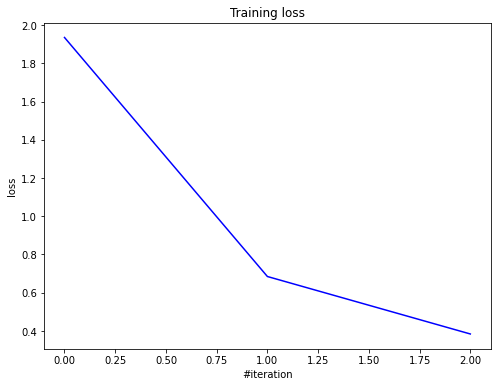

Iteration number: 3
Current loss: 0.386548


In [354]:
train_loss_history = []
#test_loss_history = []

time_start = time()
for i in range(n_epoch):
    for x_batch, y_batch in get_batches((X_train, y_train), batch_size):
        
        net_bn.zeroGradParameters()
        
        # Forward
        predictions = net_bn.forward(x_batch)
        loss = criterion.forward(predictions, y_batch)
    
        # Backward
        dp = criterion.backward(predictions, y_batch)
        net_bn.backward(x_batch, dp)
        
        # Update weights
        sgd_momentum(net_bn.getParameters(), 
                     net_bn.getGradParameters(), 
                     optimizer_config,
                     optimizer_state) 
    
    
    train_pred = net_bn.forward(X_train)
    train_loss = criterion.forward(train_pred, y_train)
    train_loss_history.append(train_loss)
    
    #test_pred = net_ReLU.forward(X_test)
    #test_loss = criterion.forward(test_pred, y_test)
    #test_loss_history.append(test_loss)
    
    # Visualize
    display.clear_output(wait=True)
    plt.figure(figsize=(8, 6))
        
    plt.title("Training loss")
    plt.xlabel("#iteration")
    plt.ylabel("loss")
    plt.plot(train_loss_history, 'b')
    #plt.plot(test_loss_history, color='orange')
    plt.show()
    
    print('Iteration number: {}'.format(i+1))
    print('Current loss: %f' % loss)

time_end = time()
time_elapsed = time_end - time_start

In [355]:
time_elapsed

113.10236692428589

### Let's try Adam (without BN)

In [356]:
net_ReLU = Sequential()
net_ReLU.add(Linear(784, 100))
net_ReLU.add(ReLU())
#net_ReLU.add(Linear(100, 200))
#net_ReLU.add(ReLU())
net_ReLU.add(Linear(100, 10))
net_ReLU.add(LogSoftMax())

In [357]:
n_epoch = 3
batch_size = 500

In [358]:
optimizer_config = {'learning_rate' : 1e-2, 'momentum': 0.9, 'beta1': 0.9, 'beta2': 0.9, 'epsilon': 10e-6}
optimizer_state = {}

In [359]:
criterion = ClassNLLCriterion()

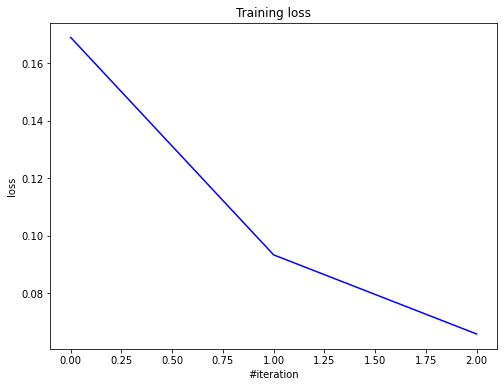

Iteration number: 3
Current loss: 0.076413


In [360]:
train_loss_history = []
#test_loss_history = []

time_start = time()
for i in range(n_epoch):
    for x_batch, y_batch in get_batches((X_train, y_train), batch_size):
        
        net_ReLU.zeroGradParameters()
        
        # Forward
        predictions = net_ReLU.forward(x_batch)
        loss = criterion.forward(predictions, y_batch)
    
        # Backward
        dp = criterion.backward(predictions, y_batch)
        net_ReLU.backward(x_batch, dp)
        
        # Update weights
        adam_optimizer(net_ReLU.getParameters(), 
                     net_ReLU.getGradParameters(), 
                     optimizer_config,
                     optimizer_state) 
    
    
    train_pred = net_ReLU.forward(X_train)
    train_loss = criterion.forward(train_pred, y_train)
    train_loss_history.append(train_loss)
    
    #test_pred = net_ReLU.forward(X_test)
    #test_loss = criterion.forward(test_pred, y_test)
    #test_loss_history.append(test_loss)
    
    # Visualize
    display.clear_output(wait=True)
    plt.figure(figsize=(8, 6))
        
    plt.title("Training loss")
    plt.xlabel("#iteration")
    plt.ylabel("loss")
    plt.plot(train_loss_history, 'b')
    #plt.plot(test_loss_history, color='orange')
    plt.show()
    
    print('Iteration number: {}'.format(i+1))
    print('Current loss: %f' % loss)

time_end = time()
time_elapsed = time_end - time_start

In [361]:
time_elapsed

110.30251502990723

# Let's try all of them

<font color=blue>Observations</font>

- On average each iteration (from 1 to n_epoch) takes half a minute. We could train each net and plot the progress after each epoch in real time (with display.clear_output(wait=True) and so on) but this would take aprox. 2 minutes per iteration, having 4 nets with different activation functions.

- Instead of this and since we care about the resulting plot, we'll train a network once all the epoch we're completed for the previous one.

In [362]:
def accuracy(y_pred, y_target):
    predicted_class = y_pred.argmax(axis=-1)
    true_class = y_target.argmax(axis=-1)
    return np.mean(predicted_class == true_class)

In [363]:
from tqdm import tqdm

In [375]:
batch_size

500

In [389]:
n_epochs = 25
np.random.seed(100)


# Train only so that we don't switch to model.evaluate() for Batch norm
def train(X_train, y_train, net, criterion, optimizer, opt_config, opt_state, batch_norm= False, test_report=False):
    
    report = {
        'train_loss':[],
        'train_acc':[],
        'test_loss':[],
        'test_acc':[],
        'training_time':0.0
    }
    
    train_loss_history = []
    train_acc_history = []
    
    test_loss_history = []
    test_acc_history = []
    
    
    for i in tqdm(range(n_epochs)):
        start = time()
        
        # We'll collect a test report only when doing batch normalization
        # for the last task of the notebook
        net.train()

        for x_batch, y_batch in get_batches((X_train, y_train), batch_size):

            net.zeroGradParameters()

            # Forward
            predictions = net.forward(x_batch)
            loss = criterion.forward(predictions, y_batch)

            # Backward
            dp = criterion.backward(predictions, y_batch)
            net.backward(x_batch, dp)

            # Update weights
            adam_optimizer(net.getParameters(), 
                         net.getGradParameters(), 
                         opt_config,
                         opt_state)
        
        report['training_time'] += time() - start
        
        net.evaluate()
        
        train_pred = net.forward(X_train)
        report['train_loss'].append(criterion.forward(train_pred, y_train))
        report['train_acc'].append(accuracy(train_pred, y_train))
        
        if not test_report:
            continue
        
        test_pred = net.forward(X_test)
        report['test_loss'].append(criterion.forward(test_pred, y_test))
        report['test_acc'].append(accuracy(test_pred, y_test))
        
    return report

In [390]:
optimizers = [sgd_momentum, adam_optimizer]

In [391]:
net_ReLU = Sequential()
net_ReLU.add(Linear(784, 100))
net_ReLU.add(ReLU())
#net_ReLU.add(Linear(100, 200))
#net_ReLU.add(ReLU())
net_ReLU.add(Linear(100, 10))
net_ReLU.add(LogSoftMax())

In [392]:
def generate_net(activation, batch_norm=False, dropout=False):
    net = Sequential()
    net.add(Linear(784, 100))
    
    if batch_norm:
        net.add(BatchNormalization(alpha=0.1))
        net.add(ChannelwiseScaling(100))
    
    net.add(activation)
    
    if dropout:
        net.add(Dropout(0.5))
        
    net.add(Linear(100, 10))
    net.add(LogSoftMax())
    
    return net

In [393]:
test_net = generate_net(ReLU(), batch_norm=False)

In [394]:
test_net

Linear 784 -> 100
ReLU
Linear 100 -> 10
LogSoftMax

### Testing functions

In [426]:
opt_config = {'learning_rate' : 1e-2, 'momentum': 0.9, 'beta1': 0.3, 'beta2': 0.5, 'epsilon': 10e-6}
optimizer_state = {}

In [396]:
criterion = ClassNLLCriterion()

In [397]:
batch_size

500

In [398]:
n_epochs

25

In [399]:
testing_report = train(X_train, y_train, test_net, ClassNLLCriterion(), adam_optimizer, optimizer_config, {})

100%|██████████| 25/25 [17:22<00:00, 41.68s/it]


In [400]:
testing_report 

{'test_acc': [],
 'test_loss': [],
 'train_acc': [0.95016,
  0.97028,
  0.97566,
  0.98166,
  0.98728,
  0.99054,
  0.99326,
  0.9859,
  0.9936,
  0.99276,
  0.9955,
  0.9939,
  0.99644,
  0.99506,
  0.99674,
  0.99642,
  0.99616,
  0.9964,
  0.99588,
  0.99626,
  0.99832,
  0.99552,
  0.99586,
  0.99794,
  0.997],
 'train_loss': [0.16552901697933772,
  0.09555004222966426,
  0.0754843737554128,
  0.05432902195847568,
  0.039529916614688444,
  0.029585819209214777,
  0.020232263940097,
  0.041860886525315215,
  0.01887442406225638,
  0.022084095025253273,
  0.013362426292470843,
  0.016769655298489523,
  0.010116251442586321,
  0.012459686552284743,
  0.00968472765000597,
  0.010606456555444918,
  0.011168154083269497,
  0.010059809226977976,
  0.013973781762414645,
  0.011843013607094706,
  0.005638589370921074,
  0.015298710389312598,
  0.015118348613222218,
  0.006565406028834098,
  0.009936242540853752],
 'training_time': 1021.0387663841248}

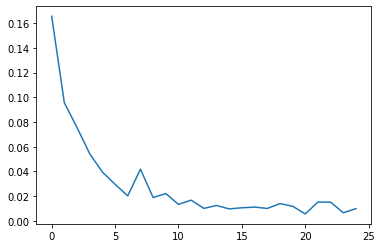

In [401]:
plt.plot(testing_report['train_loss'])

In [78]:
test_net.forward(X_test).shape

(10000, 10)

In [79]:
nets = []

In [80]:
nets = {
    'net_ReLU': {
        'activation': ReLU(),
        'loss_hist': None
    }
}

### Compare ReLU, ELU, LeakyReLU, SoftPlus activation functions. You would better pick the best optimizer params for each of them, but it is overkill for now. Use an architecture of your choice for the comparison.

In [81]:
activations = [ReLU(), ELU(), LeakyReLU(), SoftPlus()]

In [82]:
ReLU().__repr__()

'ReLU'

In [83]:
sgd_reports = {k.__repr__():None for k in activations}

In [85]:
adam_reports = sgd_reports.copy()

In [87]:
sgd_reports

{'ELU': None, 'LeakyReLU': None, 'ReLU': None, 'SoftPlus': None}

In [88]:
def gather_losses(losses, activations, optimizer, batch_norm=False):
    for activ_name, activ_f in zip(losses.keys(), activations):
        net = generate_net(activ_f, batch_norm=batch_norm)
        losses[activ_name] = train(X_train, y_train, net, ClassNLLCriterion(), optimizer, opt_config, {})

In [89]:
def plot_losses(reports):
    plt.figure(figsize=(10,8))
    for name, report in reports.items():
        plt.plot(report['train_loss'], label=name)
        plt.legend(loc="upper right")

In [90]:
gather_losses(sgd_reports, activations, sgd_momentum)

In [91]:
sgd_reports

{'ELU': {'test_acc': [],
  'test_loss': [],
  'train_acc': [0.95446, 0.97516, 0.98238],
  'train_loss': [0.14730353610404695,
   0.08162090311472947,
   0.05667156894768637],
  'training_time': 119.91795921325684},
 'LeakyReLU': {'test_acc': [],
  'test_loss': [],
  'train_acc': [0.95272, 0.97312, 0.98206],
  'train_loss': [0.15904580651201736, 0.08707348771735769, 0.0578741303613996],
  'training_time': 110.90943098068237},
 'ReLU': {'test_acc': [],
  'test_loss': [],
  'train_acc': [0.95306, 0.97322, 0.98102],
  'train_loss': [0.15648894625999415,
   0.08810709166342856,
   0.06032837614360669],
  'training_time': 120.76204943656921},
 'SoftPlus': {'test_acc': [],
  'test_loss': [],
  'train_acc': [0.95238, 0.9714, 0.98126],
  'train_loss': [0.16400911652563907,
   0.0953646433214644,
   0.056695244204472535],
  'training_time': 108.93252873420715}}

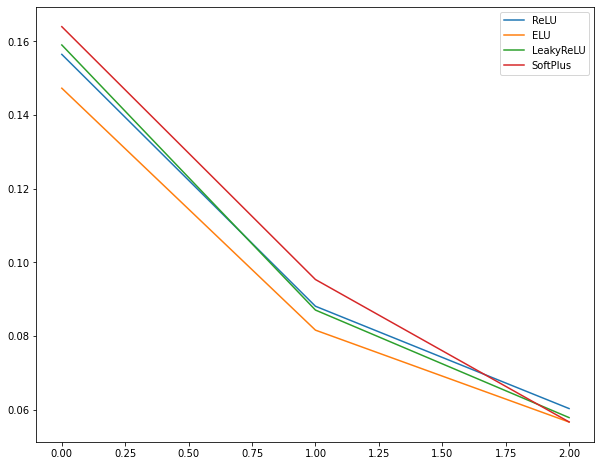

In [229]:
plot_losses(sgd_reports)

In [230]:
sgd_reports

{'ELU': {'test_acc': [],
  'test_loss': [],
  'train_acc': [0.95446, 0.97516, 0.98238],
  'train_loss': [0.14730353610404695,
   0.08162090311472947,
   0.05667156894768637],
  'training_time': 119.91795921325684},
 'LeakyReLU': {'test_acc': [],
  'test_loss': [],
  'train_acc': [0.95272, 0.97312, 0.98206],
  'train_loss': [0.15904580651201736, 0.08707348771735769, 0.0578741303613996],
  'training_time': 110.90943098068237},
 'ReLU': {'test_acc': [],
  'test_loss': [],
  'train_acc': [0.95306, 0.97322, 0.98102],
  'train_loss': [0.15648894625999415,
   0.08810709166342856,
   0.06032837614360669],
  'training_time': 120.76204943656921},
 'SoftPlus': {'test_acc': [],
  'test_loss': [],
  'train_acc': [0.95238, 0.9714, 0.98126],
  'train_loss': [0.16400911652563907,
   0.0953646433214644,
   0.056695244204472535],
  'training_time': 108.93252873420715}}

In [231]:
sgd_reports['ReLU']

{'test_acc': [],
 'test_loss': [],
 'train_acc': [0.95306, 0.97322, 0.98102],
 'train_loss': [0.15648894625999415, 0.08810709166342856, 0.06032837614360669],
 'training_time': 120.76204943656921}

In [232]:
import pandas as pd

In [236]:
df = pd.DataFrame({
    'train_loss': sgd_reports['ReLU']['train_loss'][-1],
    'train_acc' : sgd_reports['ReLU']['train_acc'][-1]
},
    index=['ReLU']
)

In [237]:
df

,train_loss,train_acc
ReLU,0.060328,0.98102


In [241]:
df.loc['ReLU','train_loss']

0.06032837614360669

In [284]:
def data_report(reports):
    df = pd.DataFrame(columns=['Train Loss', 'Training Accuracy', 'Training Time'])
    
    for act_name, report in reports.items():
        df.loc[act_name] = [report['train_loss'][-1], report['train_acc'][-1], report['training_time']]
    display.display(df.style.highlight_min(color='cyan'))

In [283]:
data_report(sgd_reports)

,Train Loss,Training Accuracy,Training Time
ReLU,0.060328,0.981020,120.762049
ELU,0.056672,0.982380,119.917959
LeakyReLU,0.057874,0.982060,110.909431
SoftPlus,0.056695,0.981260,108.932529


In [402]:
columns = ['train_loss', 'train_acc', 'training_time']
hmin = ['train_loss', 'train_time']
hmax = ['train_acc']

In [409]:
def data_report(reports, cols, hmin, hmax):
    df = pd.DataFrame(columns=[*cols, 'train_time'])
    
    for act_name, report in reports.items():
        data = [report[col][-1] for col in cols]
        df.loc[act_name] = [*data, report['training_time']]
    display.display(df.style.highlight_min(subset=hmin, color='cyan').highlight_max(subset=hmax, color='yellow'))

In [410]:
sgd_reports['ReLU']['training_time']

120.76204943656921

In [411]:
df

,train_loss,train_acc
ReLU,0.060328,0.98102


In [412]:
cols = ['train_loss', 'train_acc']

In [413]:
data_report(sgd_reports, cols, hmin, hmax)

,train_loss,train_acc,train_time
ReLU,0.060328,0.981020,120.762049
ELU,0.056672,0.982380,119.917959
LeakyReLU,0.057874,0.982060,110.909431
SoftPlus,0.056695,0.981260,108.932529


### **Try** inserting `BatchNormalization` (folowed by `ChannelwiseScaling`) between `Linear` module and activation functions.

In [94]:
bn_reports = {k.__repr__()+'_BN':None for k in activations}

In [95]:
bn_reports

{'ELU_BN': None, 'LeakyReLU_BN': None, 'ReLU_BN': None, 'SoftPlus_BN': None}

In [96]:
gather_losses(bn_reports, activations, sgd_momentum, batch_norm=True)

In [97]:
bn_reports

{'ELU_BN': {'test_acc': [],
  'test_loss': [],
  'train_acc': [0.92096, 0.93938, 0.95756],
  'train_loss': [0.2702796819093159, 0.21044301443745972, 0.1488565319802293],
  'training_time': 110.54046988487244},
 'LeakyReLU_BN': {'test_acc': [],
  'test_loss': [],
  'train_acc': [0.94756, 0.97164, 0.98092],
  'train_loss': [0.17934487953140724, 0.09980048215901427, 0.065222201644889],
  'training_time': 107.98985695838928},
 'ReLU_BN': {'test_acc': [],
  'test_loss': [],
  'train_acc': [0.94424, 0.97228, 0.97996],
  'train_loss': [0.19004411538284272,
   0.10120857792960858,
   0.06887736928153435],
  'training_time': 98.13678359985352},
 'SoftPlus_BN': {'test_acc': [],
  'test_loss': [],
  'train_acc': [0.91892, 0.94266, 0.96118],
  'train_loss': [0.27539924445906, 0.19429144874584045, 0.13308460714709383],
  'training_time': 119.54688501358032}}

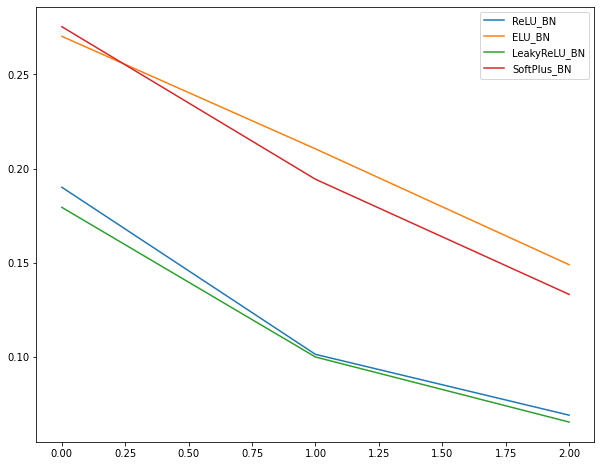

In [98]:
plot_losses(bn_reports)

In [99]:
sgd_reports

{'ELU': {'test_acc': [],
  'test_loss': [],
  'train_acc': [0.95446, 0.97516, 0.98238],
  'train_loss': [0.14730353610404695,
   0.08162090311472947,
   0.05667156894768637],
  'training_time': 119.91795921325684},
 'LeakyReLU': {'test_acc': [],
  'test_loss': [],
  'train_acc': [0.95272, 0.97312, 0.98206],
  'train_loss': [0.15904580651201736, 0.08707348771735769, 0.0578741303613996],
  'training_time': 110.90943098068237},
 'ReLU': {'test_acc': [],
  'test_loss': [],
  'train_acc': [0.95306, 0.97322, 0.98102],
  'train_loss': [0.15648894625999415,
   0.08810709166342856,
   0.06032837614360669],
  'training_time': 120.76204943656921},
 'SoftPlus': {'test_acc': [],
  'test_loss': [],
  'train_acc': [0.95238, 0.9714, 0.98126],
  'train_loss': [0.16400911652563907,
   0.0953646433214644,
   0.056695244204472535],
  'training_time': 108.93252873420715}}

In [100]:
bn_reports

{'ELU_BN': {'test_acc': [],
  'test_loss': [],
  'train_acc': [0.92096, 0.93938, 0.95756],
  'train_loss': [0.2702796819093159, 0.21044301443745972, 0.1488565319802293],
  'training_time': 110.54046988487244},
 'LeakyReLU_BN': {'test_acc': [],
  'test_loss': [],
  'train_acc': [0.94756, 0.97164, 0.98092],
  'train_loss': [0.17934487953140724, 0.09980048215901427, 0.065222201644889],
  'training_time': 107.98985695838928},
 'ReLU_BN': {'test_acc': [],
  'test_loss': [],
  'train_acc': [0.94424, 0.97228, 0.97996],
  'train_loss': [0.19004411538284272,
   0.10120857792960858,
   0.06887736928153435],
  'training_time': 98.13678359985352},
 'SoftPlus_BN': {'test_acc': [],
  'test_loss': [],
  'train_acc': [0.91892, 0.94266, 0.96118],
  'train_loss': [0.27539924445906, 0.19429144874584045, 0.13308460714709383],
  'training_time': 119.54688501358032}}

### Plot the losses both from activation functions comparison and BatchNormalization comparison on one plot. Please find a scale (log?) when the lines are distinguishable, do not forget about naming the axes, the plot should be goodlooking.

In [101]:
colors = ['b', 'r', 'g', 'm']

In [102]:
net_modes = [
    [k.__repr__(), k.__repr__()+'_BN', color] for k, color in zip(activations, colors) 
]

In [103]:
net_modes

[['ReLU', 'ReLU_BN', 'b'],
 ['ELU', 'ELU_BN', 'r'],
 ['LeakyReLU', 'LeakyReLU_BN', 'g'],
 ['SoftPlus', 'SoftPlus_BN', 'm']]

In [104]:
net_modes

[['ReLU', 'ReLU_BN', 'b'],
 ['ELU', 'ELU_BN', 'r'],
 ['LeakyReLU', 'LeakyReLU_BN', 'g'],
 ['SoftPlus', 'SoftPlus_BN', 'm']]

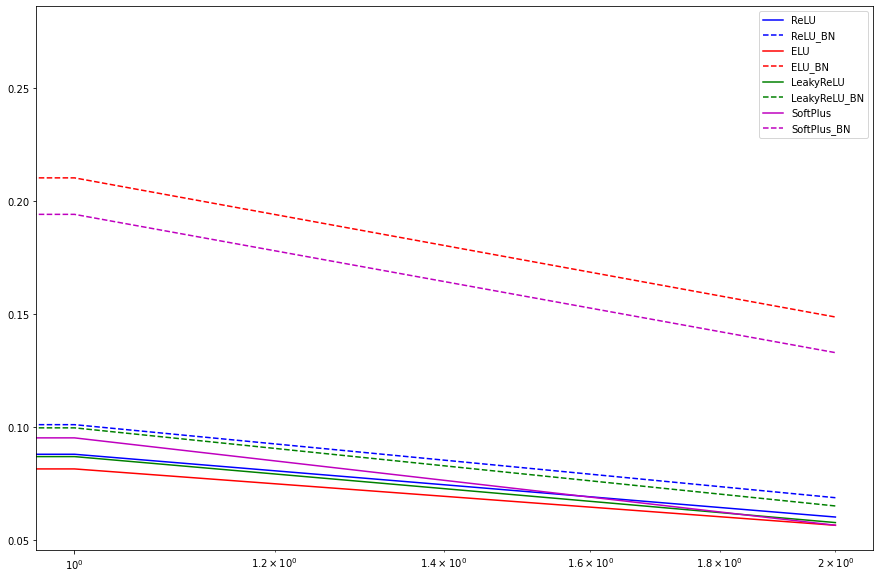

In [414]:
plt.figure(figsize=(15,10))
for mode in net_modes:
    plt.semilogx(sgd_reports[mode[0]]['train_loss'], mode[2], label=mode[0])
    plt.semilogx(bn_reports[mode[1]]['train_loss'], mode[2]+'--', label=mode[1])
    plt.legend(loc="upper right")

In [415]:
cols = ['train_loss', 'train_acc']
hmin = ['train_loss', 'train_time']
hmax = ['train_acc']
data_report(bn_reports, cols, hmin, hmax)

,train_loss,train_acc,train_time
ReLU_BN,0.068877,0.979960,98.136784
ELU_BN,0.148857,0.957560,110.540470
LeakyReLU_BN,0.065222,0.980920,107.989857
SoftPlus_BN,0.133085,0.961180,119.546885


In [419]:
from IPython import display
from IPython.display import HTML

CSS = """
div.cell:nth-child(5) .output {
    flex-direction: row;
}
"""

HTML('<style>{}</style>'.format(CSS))

In [420]:
data_report(bn_reports, cols, hmin, hmax)
data_report(bn_reports, cols, hmin, hmax)

,train_loss,train_acc,train_time
ReLU_BN,0.068877,0.979960,98.136784
ELU_BN,0.148857,0.957560,110.540470
LeakyReLU_BN,0.065222,0.980920,107.989857
SoftPlus_BN,0.133085,0.961180,119.546885


,train_loss,train_acc,train_time
ReLU_BN,0.068877,0.979960,98.136784
ELU_BN,0.148857,0.957560,110.540470
LeakyReLU_BN,0.065222,0.980920,107.989857
SoftPlus_BN,0.133085,0.961180,119.546885


### Plot the losses for two networks: one trained by momentum_sgd, another one trained by Adam. Which one performs better?

In [450]:
opt_config = {'learning_rate' : 1e-3, 'momentum': 0.9, 'beta1': 0.9, 'beta2': 0.99, 'epsilon': 10e-6}
optimizer_state = {}

In [451]:
net_SGB = Sequential()
net_SGB.add(Linear(784, 100))
net_SGB.add(ReLU())
net_SGB.add(Linear(100, 200))
net_SGB.add(ReLU())
net_SGB.add(Linear(200, 10))
net_SGB.add(LogSoftMax())

In [452]:
net_Adam = Sequential()
net_Adam.add(Linear(784, 100))
net_Adam.add(ReLU())
net_Adam.add(Linear(100, 200))
net_Adam.add(ReLU())
net_Adam.add(Linear(200, 10))
net_Adam.add(LogSoftMax())

In [453]:
sgd_net = generate_net(ELU(), batch_norm=False, dropout=False)

In [454]:
sgd_report = train(X_train, y_train, net_SGB, ClassNLLCriterion(), sgd_momentum, opt_config, {})

100%|██████████| 25/25 [17:39<00:00, 42.37s/it]


In [440]:
adam_net = generate_net(ELU(), batch_norm=False, dropout=False)

In [455]:
adam_report = train(X_train, y_train, net_Adam, ClassNLLCriterion(), adam_optimizer, opt_config, {})

100%|██████████| 25/25 [17:24<00:00, 41.77s/it]


In [110]:
sgd_report

{'test_acc': [],
 'test_loss': [],
 'train_acc': [0.9568, 0.97236, 0.98046],
 'train_loss': [0.14434109584849172, 0.08921882534812842, 0.06197754249477569],
 'training_time': 110.77602458000183}

In [111]:
adam_report

{'test_acc': [],
 'test_loss': [],
 'train_acc': [0.9521, 0.97464, 0.98378],
 'train_loss': [0.1554456413034282, 0.08222439543074034, 0.05282390418545333],
 'training_time': 122.44293189048767}

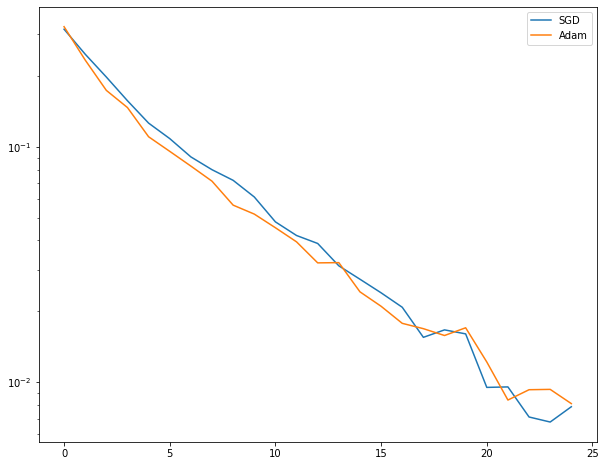

In [457]:
plt.figure(figsize=(10,8))
plt.semilogy(sgd_report['train_loss'], label='SGD')
plt.semilogy(adam_report['train_loss'], label='Adam')
plt.legend()

Write your personal opinion on the activation functions, think about computation times too. Does `BatchNormalization` help?

In [113]:
# Your answer goes here. ################################################

**Finally**, use all your knowledge to build a super cool model on this dataset. Use **dropout** to prevent overfitting, play with **learning rate decay**. You can use **data augmentation** such as rotations, translations to boost your score. Use your knowledge and imagination to train a model. Don't forget to call `training()` and `evaluate()` methods to set desired behaviour of `BatchNormalization` and `Dropout` layers.

In [114]:
# Your code goes here. ################################################

# Data Augmentation

In [117]:
from scipy.ndimage.interpolation import shift
import matplotlib

(-0.5, 27.5, 27.5, -0.5)

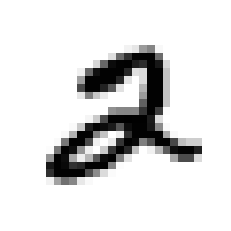

In [118]:
plt.imshow(
    X_train[5].reshape(28,28), 
    cmap=matplotlib.cm.binary,
    interpolation='nearest'
)
plt.axis('off')

(-0.5, 27.5, 27.5, -0.5)

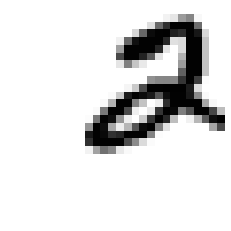

In [119]:
plt.imshow(
    shift(X_train[5].reshape(28,28), (-4.0, 5.0), mode='nearest'), 
    cmap=matplotlib.cm.binary,
    interpolation='nearest'
)
plt.axis('off')

It works, but shifting the images by 1 pixel will be enough. Let's make a special function for that

In [120]:
def shift_function(element, rowshift=None, colshift=None):
    
    if rowshift == 'up':
        axis_0 = -1.0
    elif rowshift == 'down':
        axis_0 = 1.0
        
    if colshift == 'left':
        axis_1 = -1.0
    elif colshift == 'right':
        axis_1 = 1.0

    return shift(element.reshape(28,28), (axis_0, axis_1), mode='nearest').reshape(784)

In [121]:
new_image = shift_function(X_train[30], 'down', 'right')

In [122]:
new_image = new_image.reshape(28,28)

Let's test the function:

(-0.5, 27.5, 27.5, -0.5)

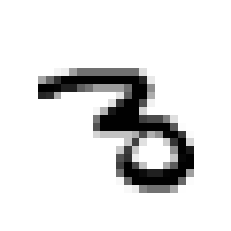

In [123]:
plt.imshow(
    new_image, 
    cmap=matplotlib.cm.binary,
    interpolation='nearest'
)
plt.axis('off')

It works find, so let's know perform the data augmentation:

In [124]:
from itertools import product

In [134]:
X_train.shape, y_train.shape

((50000, 784), (50000, 10))

In [135]:
X_train_aug = [X_train]
y_train_aug = [y_train]

In [136]:
for row_shift, col_shift in product(['up', 'down'], ['right']):
    shifted_images = np.apply_along_axis(shift_function, 1, arr=X_train, rowshift=row_shift, colshift=col_shift)
    X_train_aug.append(shifted_images)
    y_train_aug.append(y_train)

In [137]:
X_train_aug = np.concatenate(X_train_aug)
y_train_aug = np.concatenate(y_train_aug)

In [138]:
X_train_aug.shape, y_train_aug.shape

((150000, 784), (150000, 10))

Let's define the net only with dropout:

In [167]:
net_drop = Sequential()
net_drop.add(Linear(784, 400))
net_drop.add(Dropout(0.5))
net_drop.add(ELU())
#net_drop.add(Linear(400, 200))
#net_drop.add(Dropout(0.5))
#net_drop.add(ELU())
net_drop.add(Linear(400, 100))
net_drop.add(Dropout(0.5))
net_drop.add(ELU())
net_drop.add(Linear(100, 10))
net_drop.add(LogSoftMax())

In [168]:
net_drop_report = train(X_train, y_train, net_drop, ClassNLLCriterion(), adam_optimizer, opt_config, {}, 
                        batch_norm=False, test_report=True)

In [169]:
net_drop_report

{'test_acc': [0.917, 0.9291, 0.9344],
 'test_loss': [0.28324575088389214, 0.25027213967255174, 0.2382008439852002],
 'train_acc': [0.91784, 0.92968, 0.94022],
 'train_loss': [0.2788848480743372, 0.24337890443391982, 0.19972469770438794],
 'training_time': 522.6872601509094}

In [170]:
acc = [net_drop_report['train_acc'], net_drop_report['test_acc']]
loss = [net_drop_report['train_loss'], net_drop_report['test_loss']]
labels = [['train_loss', 'test_loss'], ['train_acc', 'test_acc']]

In [171]:
import matplotlib.gridspec as gridspec

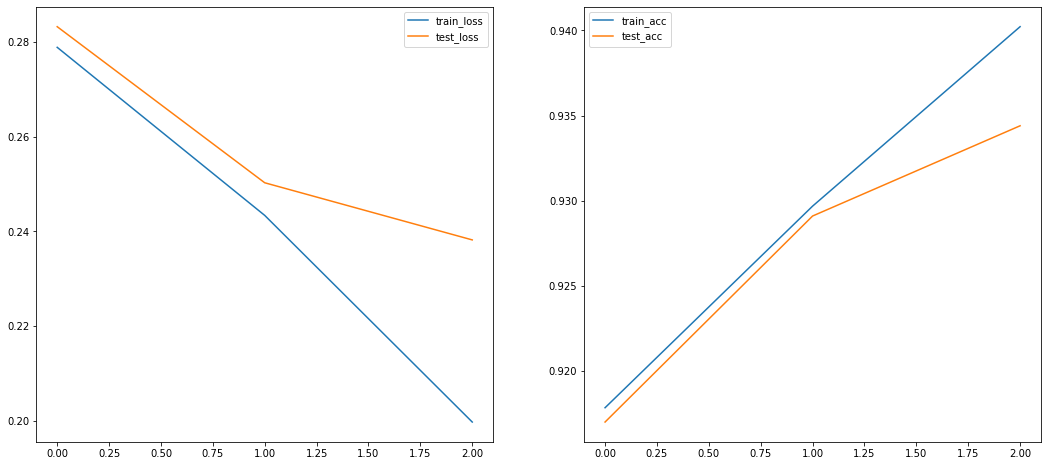

In [172]:
gs = gridspec.GridSpec(1, 2)
fig = plt.figure(figsize=(18,8))

for label, grd in zip(labels, [(0,0), (0, 1)]):
    ax = plt.subplot(gs[grd[0], grd[1]])
    plt.plot(net_drop_report[label[0]], label=label[0])
    plt.plot(net_drop_report[label[1]], label=label[1])
    plt.legend()

Print here your accuracy on test set. It should be around 90%.

In [173]:
net_drop_report['test_acc'][-1]

0.9344

In [ ]:
# Your answer goes here. ################################################

### Comparing with PyTorch implementation
The last (and maybe the easiest step after compared to the previous tasks: build a network with the same architecture as above now with PyTorch.

You can refer to the `week0_09` or `Lab3_part2` notebooks for hints.

__Good Luck!__

In [175]:
# Your beautiful code here.

In [191]:
import torch
import torch.nn as nn

In [215]:
n_epoch = 3
def train_model(model, loss_fn, opt):
    '''
    model: нейросеть для обучения,
    train_loader, val_loader: загрузчики данных
    loss_fn: целевая метрика (которую будем оптимизировать)
    opt: оптимизатор (обновляет веса нейросети)
    n_epochs: кол-во эпох, полных проходов датасета
    '''
#     train_loss = []
#     val_loss = []

#     train_accuracy = []
#     val_accuracy = []
    report = {
        'train_loss':[],
        'train_acc':[],
        'test_loss':[],
        'test_acc':[],
    }
    
    X_train_, y_train_ = torch.from_numpy(X_train), torch.from_numpy(y_train.argmax(axis=1))
    X_test_, y_test_ = torch.from_numpy(X_test), torch.from_numpy(y_test.argmax(axis=1))
    
    for epoch in range(n_epoch):
        # Turn on the training mode.
        model.train(True) # enable dropout / batch_norm training behavior
        for X_batch, y_batch in get_batches((X_train, y_train), batch_size):
            
            # 1) zero the grads
            opt.zero_grad()
            
            # move data to target device
            X_batch, y_batch = torch.from_numpy(X_batch), torch.from_numpy(y_batch.argmax(axis=1))
            
            # 2) Do forward pass
            out = model(X_batch)

            # 3) Compute loss
            loss = loss_fn(out, y_batch)
            

            # 4) Compute gradients (backward pass)
            loss.backward()
            
            # 5) Compute gradient step (with Adam) 
            opt.step()

            #ep_train_loss.append(loss.item())
            # 6) Compute train accuracy
            #y_pred = out.max(dim=1)[1]
            #ep_train_accuracy.append(np.sum((y_pred.cpu() == y_batch.cpu()).numpy().astype(float))/len(y_batch))
                        
        # Turn of training mode.
        model.train(False) # disable dropout / use moving averages for batch_norm
        # torch.no_grad() in order to save memory.
        with torch.no_grad():
            # move data to target device
            
            # TRAIN
            out = model(X_train_)
            loss = loss_fn(out, y_train_)
            report['train_loss'].append(loss.item())
            y_pred = out.max(dim=1)[1]
            report['train_acc'].append(np.sum((y_pred.cpu() == y_train_.cpu()).numpy().astype(float))/len(y_train_))
            
            # TEST
            # 1) Compute probas
            out = model(X_test_)
            loss = loss_fn(out, y_test_)
            report['test_loss'].append(loss.item())
            y_pred = out.max(dim=1)[1]### YOUR CODE HERE
            report['test_acc'].append(np.sum((y_pred.cpu() == y_test_.cpu()).numpy().astype(float))/len(y_test_))

        # print the results for this epoch:
        # print(f'Epoch {epoch + 1} of {n_epochs} took {time.time() - start_time:.3f}s')

        #train_loss.append(np.mean(ep_train_loss))
        #val_loss.append(np.mean(ep_val_loss))

        #train_accuracy.append(np.mean(ep_train_accuracy))
        #val_accuracy.append(np.mean(ep_val_accuracy))
        
        # print(f"\t  training loss: {train_loss[-1]:.6f}")
        # print(f"\tvalidation loss: {val_loss[-1]:.6f}")
        # print(f"\tvalidation accuracy: {val_accuracy[-1]:.3f}")

    return report
    # return train_loss, val_loss, val_accuracy

In [222]:
model = nn.Sequential(
    nn.Linear(784, 400),
    nn.Dropout(0.5),
    nn.ELU(),
    nn.Linear(400, 100),
    nn.Dropout(0.5),
    nn.ELU(),
    nn.Linear(100, 10),
    nn.LogSoftmax(dim=1)
)

In [223]:
opt = torch.optim.Adam(model.parameters(), lr=1e-3)

In [224]:
loss_func = nn.NLLLoss()

In [225]:
y_train.argmax(axis=1)

array([5, 0, 4, ..., 8, 4, 8])

In [226]:
torch_report = train_model(model, loss_func, opt)

In [227]:
torch_report

{'test_acc': [0.9149, 0.9311, 0.9415],
 'test_loss': [0.2842104434967041, 0.22775785624980927, 0.19442406296730042],
 'train_acc': [0.9114, 0.93168, 0.9425],
 'train_loss': [0.2973997890949249, 0.2303377091884613, 0.19174805283546448]}

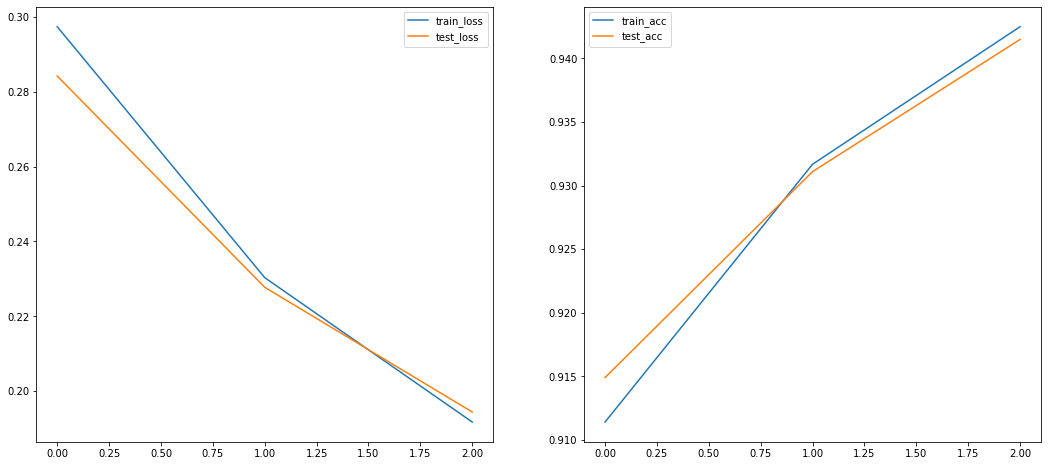

In [228]:
gs = gridspec.GridSpec(1, 2)
fig = plt.figure(figsize=(18,8))

for label, grd in zip(labels, [(0,0), (0, 1)]):
    ax = plt.subplot(gs[grd[0], grd[1]])
    plt.plot(torch_report[label[0]], label=label[0])
    plt.plot(torch_report[label[1]], label=label[1])
    plt.legend()